# HS-blast, megablast and CLAST comparsion


The specificiations of software and hardware are below. All software was ran on those specifications.

## Software specifications

All test were done running the following programs (found below). Operation system Ubuntu 14.04 LTS 64 bit.

  Software  | Version | Link
  ------------- | -------------
  Ubuntu 64 bit | 14.04 LTS | http://www.ubuntu.com/
  blast+ local | 2.3.0+ | https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastDocs&DOC_TYPE=Download
  hs-blastn | 0.0.4+ | https://github.com/chenying2016/queries
  CLAST | 0.1.5 | https://github.com/masayano/CLAST
  

## Hardware specifications

All tests and results were gain on PC with the specifications listed below.

  Hardware  | Specification
  ------------- | -------------
  CPU  | Intel(R) Core(TM) i5-4690K CPU @ 3.50 GHz
  Graphics card  | EVGA GeForce GTX 760
  Memory  | DDR3 8GB 1600 MHz
  HDD| Segagate 3 SATA TB/TO, 64MB Cache, 7200 RPM
  
  
  Graphic card details  | Specification
  ------------- | -------------
  CUDA cores  | 1152
  Base Clock  | 980 MHz
  Boost Clock  | 1033 MHz
  Memory  | 2048 MB GDDR5
  Memory Clock  | 6008 MHz
  Memory Bandwitch  | 192.2GB/s
  
  Hardware  | Cost (Amazon.com)
  ------------- | -------------
  Graphic card  | \$189.99
  CPU  | \$234.46 

## Sequances used in the result gathering

Alias for each sequance is writting because later in the graphs sometimes instead of a full name the alias is used. Artificial genomes were created with a scriptt written in C++ with a equal chance of generating a nucletoide for every four possibilities for a set length.

  Sequance  | NCBI number | Alias | Length [bp] | Size [MB] | Link 
  ------------- | -------------
  Canarypox virus, complete genome | NC_005309.1 | CV | 359,853 | 0.3651 | http://www.ncbi.nlm.nih.gov/nuccore/40555938/
  Sulfolobus islandicus LAL14/1, complete genome | CP003928.1 | Sh | 2,465,177 | 2,5 | http://www.ncbi.nlm.nih.gov/nuccore/CP003928.1
  Escherichia coli O157:H7 str. Sakai DNA, complete genome | BA000007.2 | Sh | 5,498,450 | 5,6 | http://www.ncbi.nlm.nih.gov/nuccore/BA000007.2
  Opitutaceae bacterium TAV5, complete genome | CP007053.1 | O | 7,317,842 | 7,4 | http://www.ncbi.nlm.nih.gov/nuccore/CP007053.1
  Artificial genome 1 | none | AG1 | 10,000,000 | 10,1 | none
  Artificial genome 2 | none | AG2 | 15,000,000 | 15,5 | none
  Artificial genome 3 | none | AG3 | 20,000,000 | 20,3 | none
  Artificial genome 4 | none | AG4 | 50,000,000 | 50,6 | none
  Artificial genome 5 | none | AG5 | 100,000,000 | 101,3 | none
  Artificial genome 6 | none | AG6 | 500,000,000 | 506,3 | none
  Artificial genome 7 | none | AG7 | 1000,000,000 | 1001,3 | none
  

## Initialise the libs

In [23]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

## Load the results

In [24]:
hs_blastn_index = pa.read_csv("hsblastn/hsIndex.csv")
hsPivot = pa.read_csv('hsblastn/hsIndexPivot.csv')
hsThread1 = pa.read_csv('hsblastn/hsblastnThread1.csv')
hsThread2 = pa.read_csv('hsblastn/hsblastnThread2.csv')
hsThread3 = pa.read_csv('hsblastn/hsblastnThread3.csv')
hsThread4 = pa.read_csv('hsblastn/hsblastnThread4.csv')

## Data exploration / example

In [25]:
# Plot inside the notebook
%matplotlib inline
hs_blastn_index.head()

,Sequence,Nucleotide number,Packing db,BWT,Fasta table,SA,Total,NCBI,MB seq size,id
0,"Canarypox virus, complete genome",359853,0.002963,0.174373,1.283210,0.070890,3.685100,NC_005309.1,0.3651,0
1,"Canarypox virus, complete genome",359853,0.008976,0.230844,1.268486,0.284158,3.504893,NC_005309.1,0.3651,0
2,"Canarypox virus, complete genome",359853,0.004518,0.175551,1.291483,0.100373,3.276412,NC_005309.1,0.3651,0
3,"Canarypox virus, complete genome",359853,0.007369,0.203736,1.286997,0.143967,3.359456,NC_005309.1,0.3651,0
4,"Canarypox virus, complete genome",359853,0.003062,0.173673,1.282894,0.114630,3.521501,NC_005309.1,0.3651,0


In [26]:
print (hs_blastn_index.columns)
print (hsThread2.columns)

Index(['Sequence', 'Nucleotide number', 'Packing db', 'BWT', 'Fasta table',
       'SA', 'Total', 'NCBI', 'MB seq size', 'id'],
      dtype='object')
Index(['preprocessing time', 'sequence', 'query length', 'query numeration',
       'query time'],
      dtype='object')


## Create mean from multiple results

In [27]:
meansIndex = hs_blastn_index.groupby(['Sequence']).mean().reset_index()
meanQueryThread1 = hsThread1.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread2 = hsThread2.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread3 = hsThread3.groupby(['sequence','query length']).mean().reset_index()
meanQueryThread4 = hsThread4.groupby(['sequence','query length']).mean().reset_index()

meanQueryThread1.head()

,sequence,query length,preprocessing time,query time
0,AG1,1000,0.090,0.00190
1,AG1,10000,0.090,0.00750
2,AG1,100000,0.124,0.05088
3,AG2,1000,0.090,0.00192
4,AG2,10000,0.090,0.01432


In [28]:
# Add total time to query search
meanQueryThread1['total']=meanQueryThread1['preprocessing time']+meanQueryThread1['query time']
meanQueryThread2['total']=meanQueryThread2['preprocessing time']+meanQueryThread2['query time']
meanQueryThread3['total']=meanQueryThread3['preprocessing time']+meanQueryThread3['query time']
meanQueryThread4['total']=meanQueryThread4['preprocessing time']+meanQueryThread4['query time']

meanQueryThread1.head()

,sequence,query length,preprocessing time,query time,total
0,AG1,1000,0.090,0.00190,0.09190
1,AG1,10000,0.090,0.00750,0.09750
2,AG1,100000,0.124,0.05088,0.17488
3,AG2,1000,0.090,0.00192,0.09192
4,AG2,10000,0.090,0.01432,0.10432


# Index creation

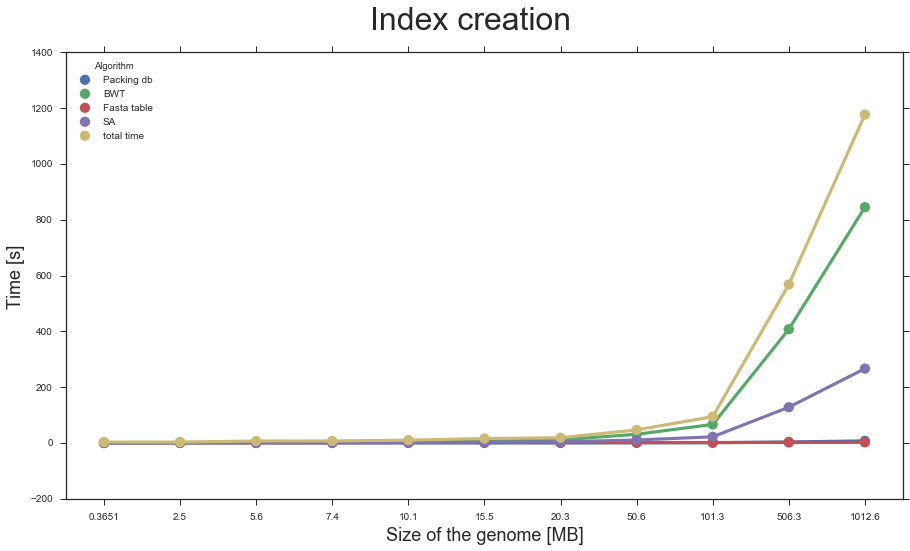

In [29]:
algorithm = hsPivot[hsPivot['Algorithm']!="size"]

sns.set(font_scale=1.2)
sns.set(style="ticks")

plt.figure(figsize=(15,8))
sns.pointplot(x="MB", y="Time", hue="Algorithm", data=algorithm,size=30, aspect=2)
plt.ylabel('Time [s]', fontsize=18)
plt.xlabel('Size of the genome [MB]', fontsize=18)
plt.suptitle("Index creation", fontsize = 32)

# Query time with multiple threads hs-blastn

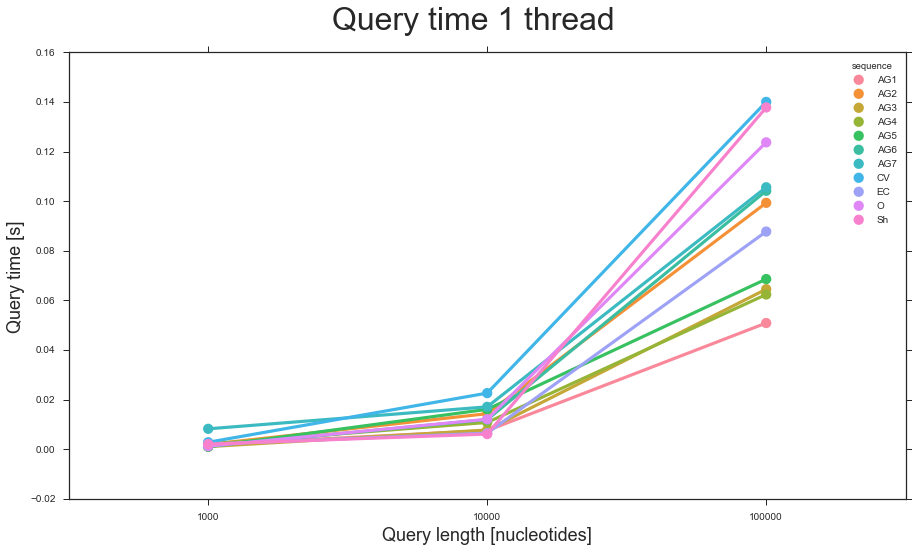

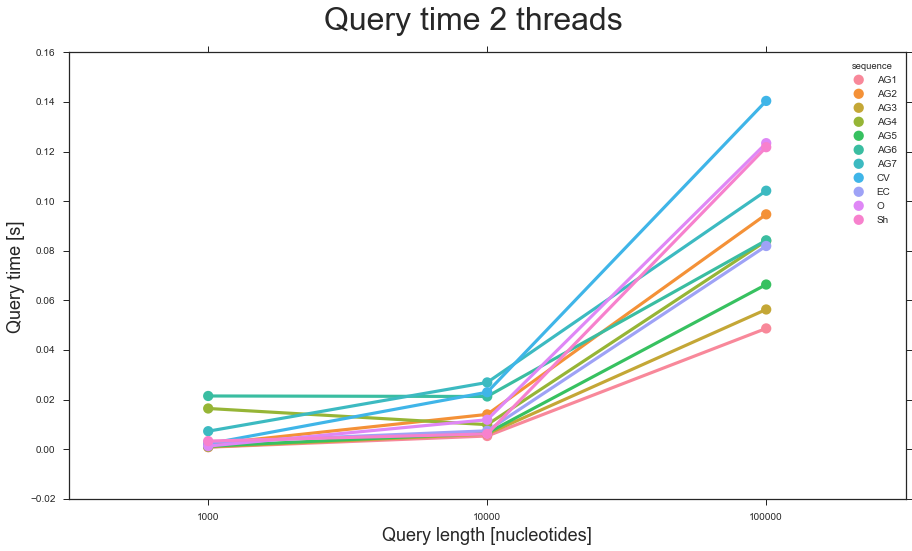

In [30]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 2 threads", fontsize = 32)

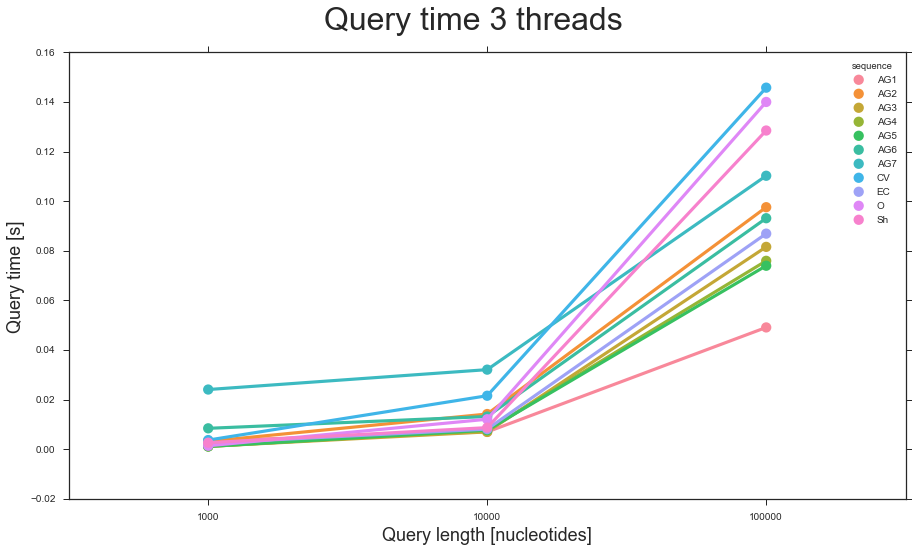

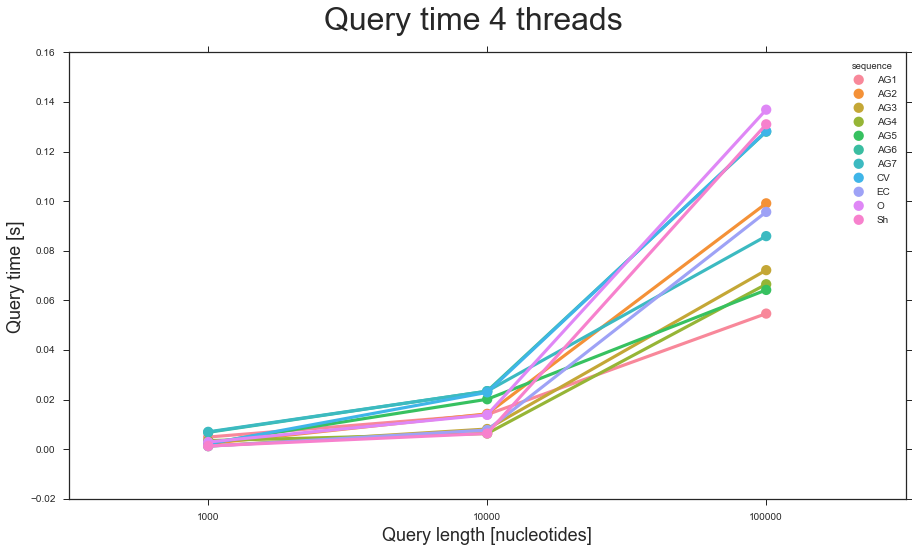

In [31]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="query time", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('Query time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Query time 4 threads", fontsize = 32)

# Database loading time with multiple threads hs-blastn

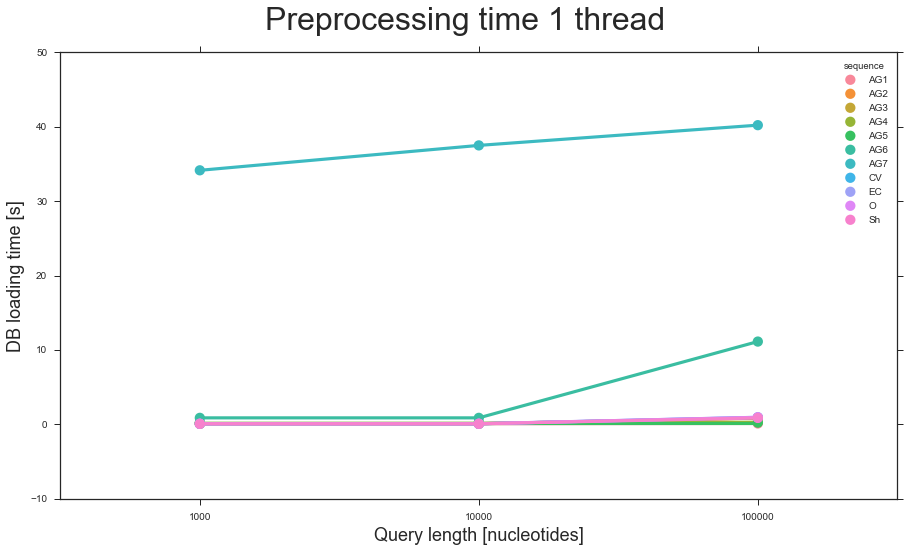

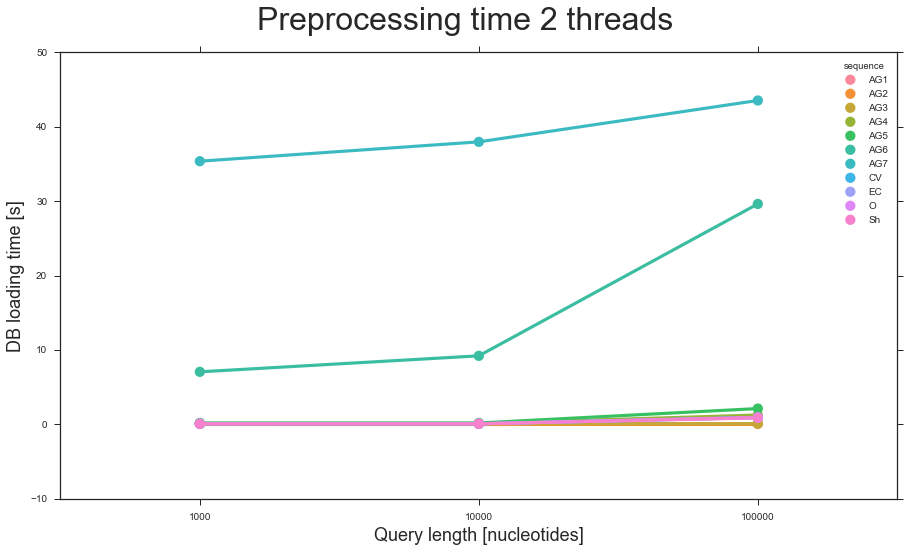

In [32]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 2 threads", fontsize = 32)

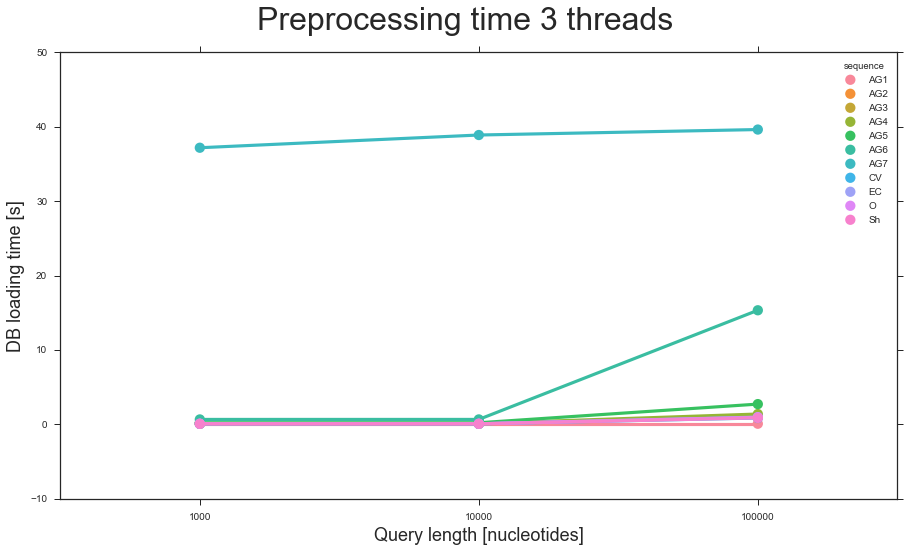

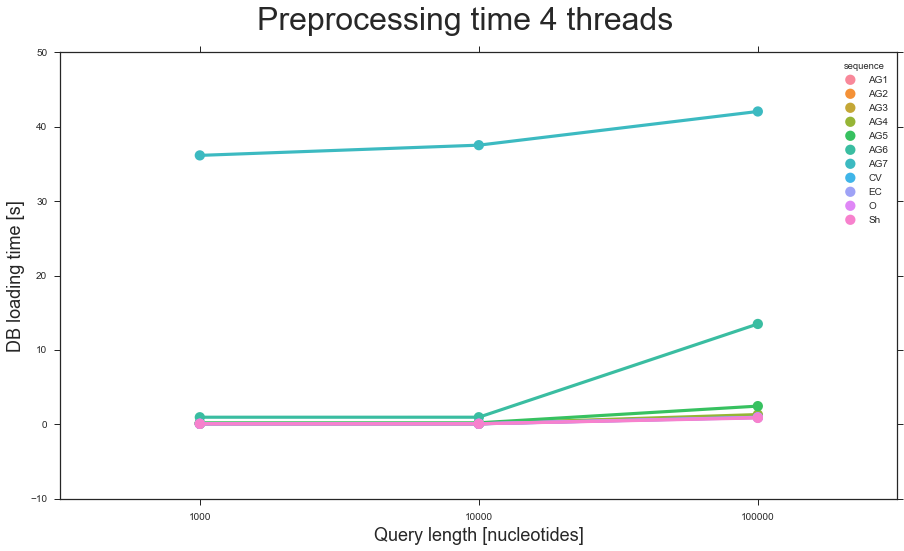

In [33]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="preprocessing time", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('DB loading time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Preprocessing time 4 threads", fontsize = 32)

# Total time with multiple threads hs-blastn

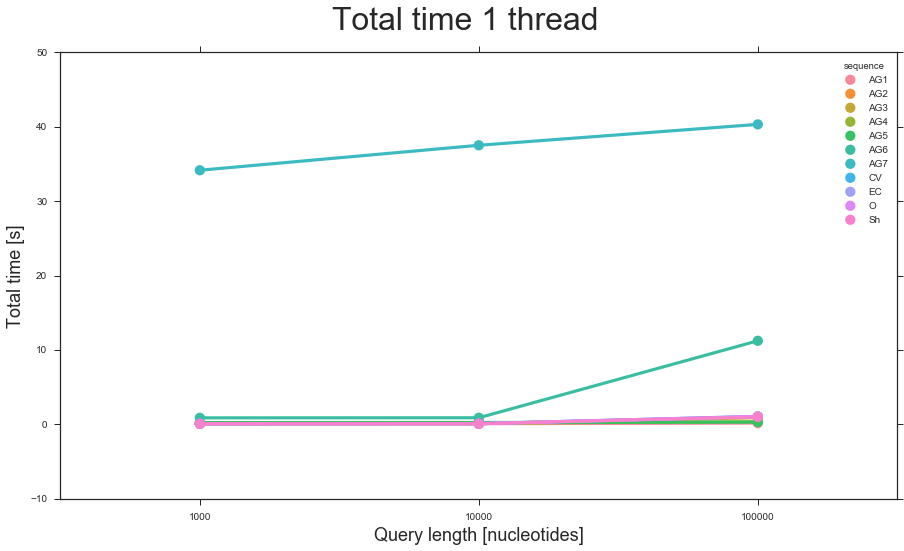

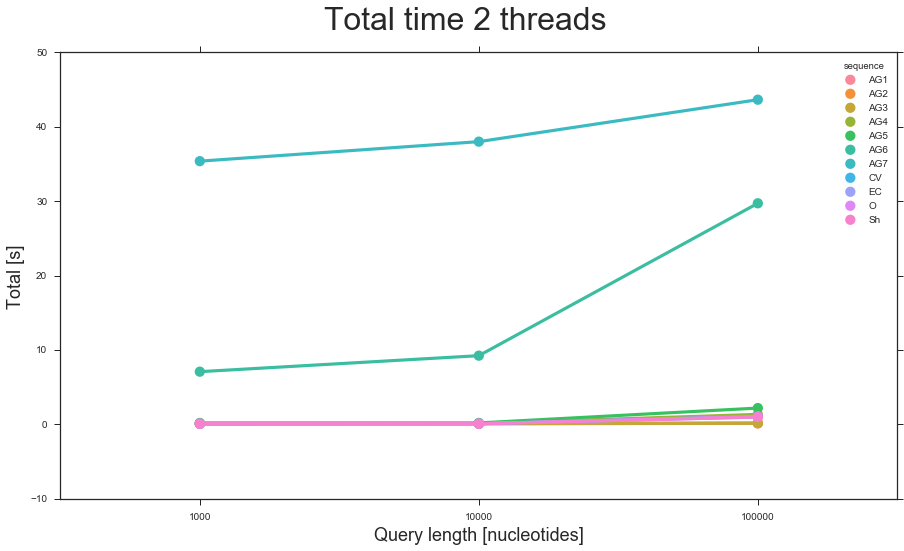

In [34]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread1,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 1 thread", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread2,size=30, aspect=2)
plt.ylabel('Total [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 2 threads", fontsize = 32)

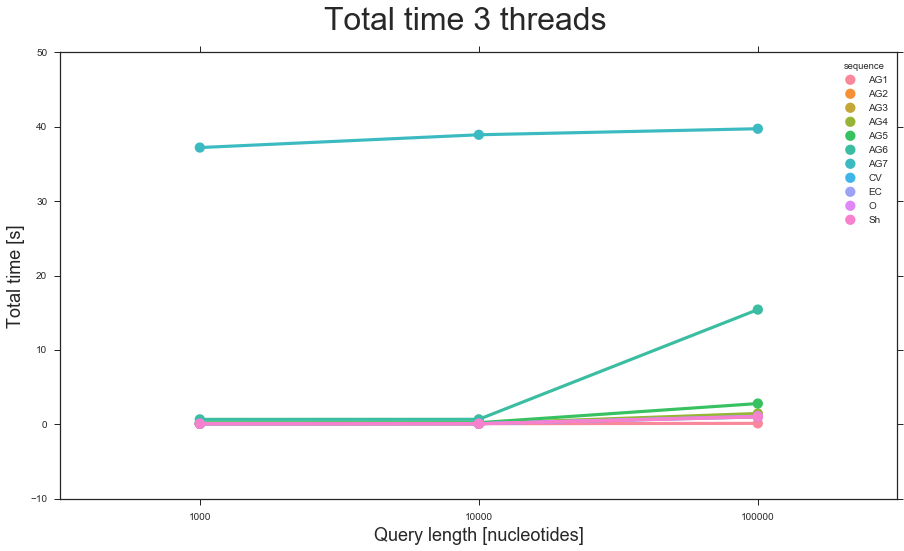

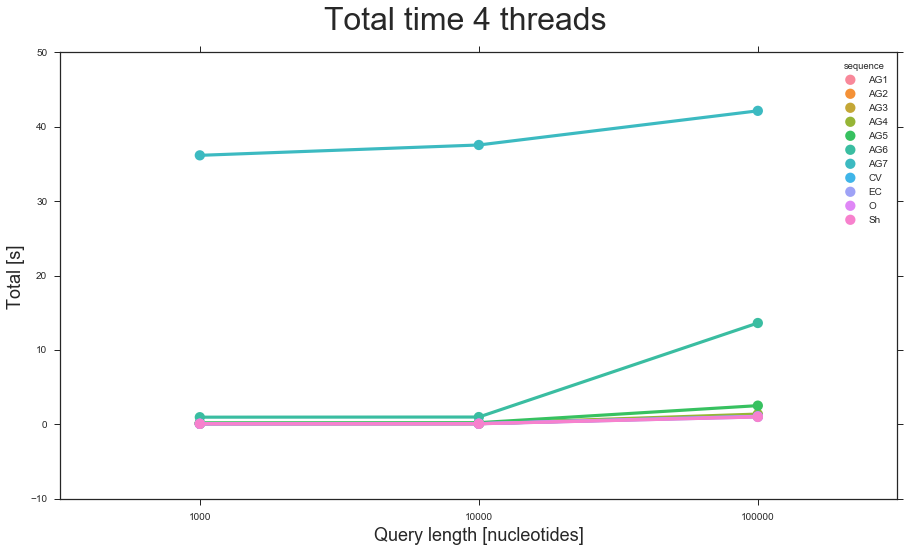

In [35]:
plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread3,size=30, aspect=2)
plt.ylabel('Total time [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 3 threads", fontsize = 32)

plt.figure(figsize=(15,8))
sns.pointplot(x="query length", y="total", hue="sequence", data=meanQueryThread4,size=30, aspect=2)
plt.ylabel('Total [s]', fontsize=18)
plt.xlabel('Query length [nucleotides]', fontsize=18)
plt.suptitle("Total time 4 threads", fontsize = 32)